In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv("movies.csv")

In [3]:
movies.shape

(9742, 3)

In [4]:
ratings = pd.read_csv("ratings.csv")

In [5]:
ratings.shape

(100836, 4)

In [6]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [9]:
ratings['userId'].nunique()

610

In [18]:
max_ratings_movie_id = ratings.groupby('movieId').size().idxmax()
max_ratings_movie_id

356

In [19]:
movies.loc[movies['movieId'] == max_ratings_movie_id, 'title'].values[0]

'Forrest Gump (1994)'

In [21]:
tags = pd.read_csv("tags.csv")

In [22]:
matrix_movie_id = movies.loc[movies['title'] == 'Matrix, The (1999)', 'movieId'].values[0]
matrix_movie_id 

2571

In [23]:
matrix_tags = tags.loc[tags['movieId'] == matrix_movie_id, 'tag'].tolist()
matrix_tags

['martial arts',
 'sci-fi',
 'alternate universe',
 'philosophy',
 'post apocalyptic']

In [24]:
terminator_movie_id = movies.loc[movies['title'] == 'Terminator 2: Judgment Day (1991)', 'movieId'].values[0]
terminator_movie_id

589

In [25]:
terminator_ratings = ratings.loc[ratings['movieId'] == terminator_movie_id, 'rating']
terminator_ratings

552      3.0
806      3.0
886      2.5
1286     4.0
1449     5.0
        ... 
97461    3.5
98514    4.0
98786    3.0
99519    3.0
99573    5.0
Name: rating, Length: 224, dtype: float64

In [26]:
terminator_ratings.mean()

3.970982142857143

In [28]:
fight_club_movie_id = movies.loc[movies['title'] == 'Fight Club (1999)', 'movieId'].values[0]
fight_club_movie_id

2959

In [29]:
fight_club_ratings = ratings.loc[ratings['movieId'] == fight_club_movie_id, 'rating']
fight_club_ratings

192      5.0
458      2.0
1134     0.5
1479     2.5
1635     3.5
        ... 
95893    5.0
96788    4.0
97835    5.0
99107    5.0
99699    5.0
Name: rating, Length: 218, dtype: float64

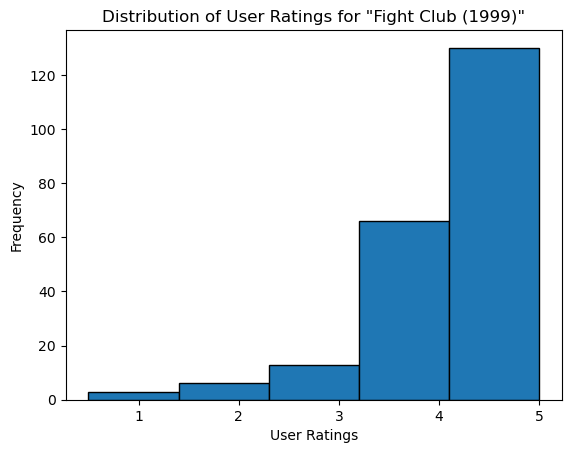

In [30]:
plt.hist(fight_club_ratings, bins=5, edgecolor='black')
plt.xlabel('User Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.show()

In [31]:
# Step 1: Group user ratings based on movieId and apply aggregation operations
grouped_ratings = ratings.groupby('movieId').agg({'rating': ['count', 'mean']})

In [32]:
merged_df = pd.merge(movies, grouped_ratings, left_on='movieId', right_index=True, how='inner')

MergeError: Not allowed to merge between different levels. (1 levels on the left, 2 on the right)

In [33]:
grouped_ratings.columns = ['_'.join(col).strip() for col in grouped_ratings.columns.values]

In [35]:
merged_df = pd.merge(movies, grouped_ratings, left_on='movieId', right_index=True, how='inner')

In [36]:
filtered_df = merged_df[merged_df['rating_count'] > 50]
filtered_df

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8305,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8372,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8376,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8475,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [37]:
filtered_df.loc[filtered_df['rating_mean'].idxmax()]

movieId                                      318
title           Shawshank Redemption, The (1994)
genres                               Crime|Drama
rating_count                                 317
rating_mean                             4.429022
Name: 277, dtype: object

In [38]:
filtered_df.sort_values(by='rating_count', ascending=False).head(5)

,movieId,title,genres,rating_count,rating_mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


In [40]:
sci_fi_movies = filtered_df[filtered_df['genres'].str.contains('Sci-Fi')]
sci_fi_movies

,movieId,title,genres,rating_count,rating_mean
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,177,3.983051
133,160,Congo (1995),Action|Adventure|Mystery|Sci-Fi,57,2.877193
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
145,173,Judge Dredd (1995),Action|Crime|Sci-Fi,62,2.669355
176,208,Waterworld (1995),Action|Adventure|Sci-Fi,115,2.913043
...,...,...,...,...,...
7693,89745,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX,69,3.869565
7767,91500,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,54,3.435185
8376,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8475,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [44]:
top_sci_fi_movies = sci_fi_movies.sort_values(by='rating_count', ascending=False)
top_sci_fi_movies

,movieId,title,genres,rating_count,rating_mean
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982
898,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640
...,...,...,...,...,...
8691,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54,3.833333
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
2029,2701,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western,53,2.207547
559,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...,53,2.707547


In [45]:
top_sci_fi_movies.iloc[2]

movieId                                      480
title                       Jurassic Park (1993)
genres          Action|Adventure|Sci-Fi|Thriller
rating_count                                 238
rating_mean                                 3.75
Name: 418, dtype: object

In [47]:
links = pd.read_csv("links.csv")
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [48]:
import requests
from bs4 import BeautifulSoup

# Read links.csv to get IMDb IDs
# Assume that you have a DataFrame 'links_df' with columns 'movieId' and 'imdbId'
# You can load the DataFrame using pandas

# Example code (modify it based on your actual DataFrame)
# links_df = pd.read_csv('links.csv')

for index, row in links.iterrows():
    movie_id = row['movieId']
    imdb_id = row['imdbId']

    # Construct IMDb URL
    imdb_url = f'http://www.imdb.com/title/{imdb_id}/reviews'

    # Make an HTTP request
    response = requests.get(imdb_url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content
        soup = BeautifulSoup(response.content, 'html.parser')

        # Extract reviews (modify this part based on IMDb HTML structure)
        reviews = soup.find_all('div', class_='text show-more__control')

        # Process and store the reviews as needed
        for review in reviews:
            # Process each review (e.g., store in a list, database, or file)
            print(review.text)
    else:
        print(f"Failed to fetch reviews for movie ID {movie_id}")

# Note: This is a simplified example, and you may need to adjust the code based on IMDb's HTML structure.


Failed to fetch reviews for movie ID 1.0
Failed to fetch reviews for movie ID 2.0
Failed to fetch reviews for movie ID 3.0
Failed to fetch reviews for movie ID 4.0
Failed to fetch reviews for movie ID 5.0
Failed to fetch reviews for movie ID 6.0
Failed to fetch reviews for movie ID 7.0
Failed to fetch reviews for movie ID 8.0
Failed to fetch reviews for movie ID 9.0
Failed to fetch reviews for movie ID 10.0
Failed to fetch reviews for movie ID 11.0
Failed to fetch reviews for movie ID 12.0
Failed to fetch reviews for movie ID 13.0
Failed to fetch reviews for movie ID 14.0
Failed to fetch reviews for movie ID 15.0
Failed to fetch reviews for movie ID 16.0
Failed to fetch reviews for movie ID 17.0
Failed to fetch reviews for movie ID 18.0
Failed to fetch reviews for movie ID 19.0
Failed to fetch reviews for movie ID 20.0
Failed to fetch reviews for movie ID 21.0
Failed to fetch reviews for movie ID 22.0
Failed to fetch reviews for movie ID 23.0
Failed to fetch reviews for movie ID 24.0
F

ConnectTimeout: HTTPConnectionPool(host='www.imdb.com', port=80): Max retries exceeded with url: /title/106220.0/reviews (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x0000029C822CEE90>, 'Connection to www.imdb.com timed out. (connect timeout=None)'))

In [50]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.FILL_IN_THE_BLANK(URL, headers=request_header)
    soup = FILL_IN_THE_BLANK(response.text)
    imdb_rating = soup.find('FILL_IN_THE_BLANK', attrs={'FILL_IN_THE_BLANK' : 'FILL_IN_THE_BLANK'})
    return imdb_rating.text if imdb_rating else np.nan

In [51]:
scrapper(imdbId)

NameError: name 'imdbId' is not defined

In [52]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }
    
    # Fill in the blank for the requests method
    response = requests.get(URL, headers=request_header)
    
    soup = BeautifulSoup(response.text, 'html.parser')  # Fill in the blank for the BeautifulSoup class
    
    imdb_rating = soup.find('span', attrs={'data-testid': 'default-rating'})
    
    return imdb_rating.text if imdb_rating else np.nan


In [57]:
scrapper(114709)

nan

In [58]:
sci_fi_movies.sort_values(by='rating_mean', ascending=False)

,movieId,title,genres,rating_count,rating_mean
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
898,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
901,1199,Brazil (1985),Fantasy|Sci-Fi,59,4.177966
4909,7361,Eternal Sunshine of the Spotless Mind (2004),Drama|Romance|Sci-Fi,131,4.160305
...,...,...,...,...,...
559,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...,53,2.707547
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
145,173,Judge Dredd (1995),Action|Crime|Sci-Fi,62,2.669355
379,435,Coneheads (1993),Comedy|Sci-Fi,63,2.420635


In [63]:
from requests import get
from bs4 import BeautifulSoup
from warnings import warn
from time import sleep
from random import randint
import numpy as np, pandas as pd
import seaborn as sns

In [64]:
pages = np.arange(1, 9951, 50) # Last time I tried, I could only go to 10000 items because after that the URI has no discernable pattern to combat webcrawlers; I just did 4 pages for demonstration purposes. You can increase this for your own projects.
headers = {'Accept-Language': 'en-US,en;q=0.8'} # If this is not specified, the default language is Mandarin

#initialize empty lists to store the variables scraped
titles = []
years = []
ratings = []
genres = []
runtimes = []
imdb_ratings = []
imdb_ratings_standardized = []
metascores = []
votes = []

for page in pages:
  
   #get request for sci-fi
   response = get("https://www.imdb.com/search/title?genres=sci-fi&"
                  + "start="
                  + str(page)
                  + "&explore=title_type,genres&ref_=adv_prv", headers=headers)
  
   sleep(randint(8,15))
   
   #throw warning for status codes that are not 200
   if response.status_code != 200:
       warn('Request: {}; Status code: {}'.format(requests, response.status_code))

   #parse the content of current iteration of request
   page_html = BeautifulSoup(response.text, 'html.parser')
      
   movie_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')
  
   #extract the 50 movies for that page
   for container in movie_containers:

       #conditional for all with metascore
       if container.find('div', class_ = 'ratings-metascore') is not None:

           #title
           title = container.h3.a.text
           titles.append(title)

           if container.h3.find('span', class_= 'lister-item-year text-muted unbold') is not None:
            
             #year released
             year = container.h3.find('span', class_= 'lister-item-year text-muted unbold').text # remove the parentheses around the year and make it an integer
             years.append(year)

           else:
             years.append(None) # each of the additional if clauses are to handle type None data, replacing it with an empty string so the arrays are of the same length at the end of the scraping

           if container.p.find('span', class_ = 'certificate') is not None:
            
             #rating
             rating = container.p.find('span', class_= 'certificate').text
             ratings.append(rating)

           else:
             ratings.append("")

           if container.p.find('span', class_ = 'genre') is not None:
            
             #genre
             genre = container.p.find('span', class_ = 'genre').text.replace("\n", "").rstrip().split(',') # remove the whitespace character, strip, and split to create an array of genres
             genres.append(genre)
          
           else:
             genres.append("")

           if container.p.find('span', class_ = 'runtime') is not None:

             #runtime
             time = int(container.p.find('span', class_ = 'runtime').text.replace(" min", "")) # remove the minute word from the runtime and make it an integer
             runtimes.append(time)

           else:
             runtimes.append(None)

           if float(container.strong.text) is not None:

             #IMDB ratings
             imdb = float(container.strong.text) # non-standardized variable
             imdb_ratings.append(imdb)

           else:
             imdb_ratings.append(None)

           if container.find('span', class_ = 'metascore').text is not None:

             #Metascore
             m_score = int(container.find('span', class_ = 'metascore').text) # make it an integer
             metascores.append(m_score)

           else:
             metascores.append(None)

           if container.find('span', attrs = {'name':'nv'})['data-value'] is not None:

             #Number of votes
             vote = int(container.find('span', attrs = {'name':'nv'})['data-value'])
             votes.append(vote)

           else:
               votes.append(None)

           else:
               votes.append(None)

SyntaxError: invalid syntax (4222610495.py, line 107)

In [65]:
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
import pandas as pd

In [70]:
my_url = "http://www.imdb.com/search/title?sort=num_votes,desc&start=1&title_type=feature&year=1950,2012"

In [71]:
uClient = uReq(my_url)
page_html = uClient.read()
uClient.close()

HTTPError: HTTP Error 403: Forbidden

In [72]:
page_html

NameError: name 'page_html' is not defined